In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import math

In [2]:
class KNN:
    def __init__(self, k=5, test_size=0.3):
        self.dataset = load_breast_cancer()
        self.k = k
        self.test_size = test_size
    def driver(self, scale, feature=['mean radius', 'mean texture']):
        self.toDF()
        self.selFeature(feature)
        self.splitData()
        if scale:
            self.scaler()
        self.train()
        self.predict()
        return self.result()
    def toDF(self):
        self.fvalue = pd.DataFrame(self.dataset.data, columns=self.dataset.feature_names)
        self.target = pd.Series(self.dataset.target, name='target')
        self.df = pd.concat([self.fvalue, self.target], axis=1)
    def selFeature(self, feature):
        self.sFeature = feature
    def splitData(self):
        sp = train_test_split(
            self.fvalue[self.sFeature], self.target, test_size=self.test_size, 
            random_state=42, stratify=self.target
        )
        self.X_train = sp[0]
        self.X_test  = sp[1]
        self.y_train = sp[2]
        self.y_test  = sp[3]
    def scaler(self):
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test  = scaler.transform(self.X_test)
    def train(self):
        self.knn = KNeighborsClassifier(n_neighbors = self.k)
        self.knn.fit(self.X_train, self.y_train)
    def predict(self):
        self.y_pred = self.knn.predict(self.X_test)
    def result(self):
        # Calculate accuracy, precision, recall, F1 score
        self.accuracy = round(accuracy_score(self.y_test, self.y_pred), 2)
        self.precision = round(precision_score(self.y_test, self.y_pred), 2)
        self.recall = round(recall_score(self.y_test, self.y_pred), 2)
        self.f1 = round(f1_score(self.y_test, self.y_pred), 2)
        return (self.accuracy, self.precision, self.recall, self.f1)
    def changeK(self, k):
        self.k = k
    def getResult(self):
        # Calculate accuracy, precision, recall, F1 score
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Print the scores
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')

In [3]:
knn_t = KNN()
knn_t.toDF()

In [4]:
def scatter_plot(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='target', palette='Set1', data=df)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Diagnosis')
    plt.show()

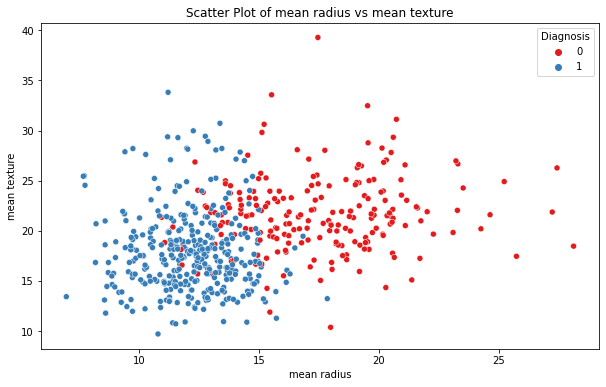

In [5]:
scatter_plot(knn_t.df, 'mean radius', 'mean texture')

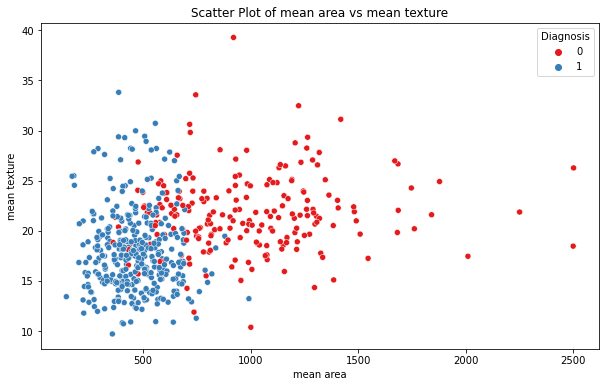

In [6]:
scatter_plot(knn_t.df, 'mean area', 'mean texture')

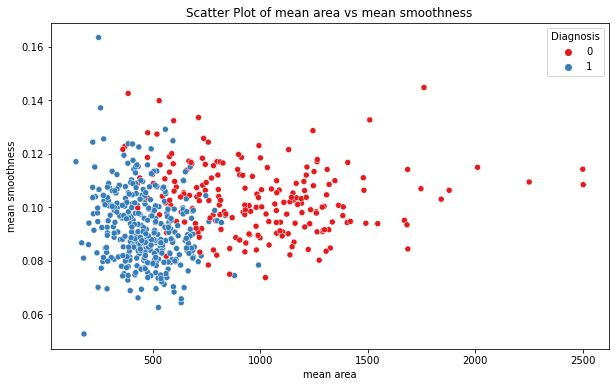

In [7]:
scatter_plot(knn_t.df, 'mean area', 'mean smoothness')

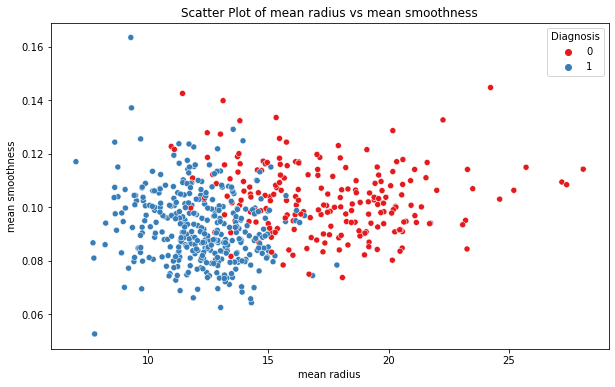

In [8]:
scatter_plot(knn_t.df, 'mean radius', 'mean smoothness')

In [9]:
Final = [[] for i in range(4)]
features = [
    ['mean area', 'mean texture'],
    ['mean area', 'mean texture'],
    ['mean radius', 'mean texture'],
    ['mean radius', 'mean texture'],
    ['mean radius', 'mean smoothness'],
    ['mean radius', 'mean smoothness']
]

In [10]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[0]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=True, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [11]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[1]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=False, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [12]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[2]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=True, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [13]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[3]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=False, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [14]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[4]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=True, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [15]:
knn = KNN(5, 0.3)
temp = [[] for i in range(4)]
feature=features[5]
for k in range(2, 10):
    knn.changeK(k)
    result = knn.driver(scale=False, feature=feature)
    for i in range(4): temp[i].append(result[i])
for i in range(4):
    Final[i].append(temp[i])

In [16]:
# accuracy
visual = pd.DataFrame(Final[0], columns=list(f"k={i}" for i in range(2, 10)))
visual

,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,0.81,0.84,0.87,0.87,0.88,0.91,0.89,0.91
1,0.86,0.87,0.88,0.88,0.87,0.88,0.87,0.88
2,0.82,0.86,0.88,0.87,0.89,0.89,0.88,0.88
3,0.81,0.87,0.87,0.86,0.89,0.89,0.88,0.89
4,0.82,0.87,0.86,0.87,0.85,0.88,0.88,0.88
5,0.82,0.85,0.83,0.87,0.85,0.87,0.86,0.86


In [17]:
# precision
visual = pd.DataFrame(Final[1], columns=list(f"k={i}" for i in range(2, 10)))
visual

,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,0.94,0.86,0.91,0.89,0.91,0.91,0.92,0.90
1,0.93,0.88,0.91,0.88,0.89,0.86,0.87,0.86
2,0.94,0.89,0.93,0.89,0.93,0.92,0.93,0.90
3,0.94,0.90,0.92,0.88,0.93,0.90,0.91,0.89
4,0.98,0.94,0.97,0.95,0.95,0.94,0.95,0.91
5,0.89,0.87,0.88,0.86,0.86,0.86,0.86,0.85


In [18]:
# recall
visual = pd.DataFrame(Final[2], columns=list(f"k={i}" for i in range(2, 10)))
visual

,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,0.74,0.89,0.87,0.91,0.90,0.94,0.92,0.96
1,0.84,0.92,0.90,0.93,0.91,0.95,0.93,0.95
2,0.76,0.89,0.88,0.90,0.89,0.92,0.88,0.92
3,0.75,0.88,0.87,0.90,0.89,0.93,0.90,0.93
4,0.73,0.84,0.80,0.83,0.81,0.87,0.85,0.90
5,0.81,0.91,0.85,0.93,0.90,0.93,0.93,0.94


In [19]:
# f1
visual = pd.DataFrame(Final[3], columns=list(f"k={i}" for i in range(2, 10)))
visual

,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,0.83,0.88,0.89,0.90,0.91,0.93,0.92,0.93
1,0.88,0.90,0.90,0.90,0.90,0.91,0.90,0.91
2,0.84,0.89,0.90,0.89,0.91,0.92,0.90,0.91
3,0.83,0.89,0.89,0.89,0.91,0.91,0.90,0.91
4,0.83,0.89,0.88,0.89,0.87,0.90,0.90,0.91
5,0.85,0.89,0.86,0.90,0.88,0.90,0.89,0.89


In [20]:
knn.dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')